In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
import seaborn as sns

In [2]:
df=pd.read_csv('heart_clean')

In [3]:
x=df.drop(['output'],axis=1)
y=df['output']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=30,stratify=df['output'])
print(f"length of train data: {x_train.shape}\nlength of test data: {x_test.shape}")

length of train data: (227, 12)
length of test data: (76, 12)


In [5]:
#Model fitting with default parameters:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [6]:
### Predicted Results:

In [7]:
y_predict=knn.predict(x_test)

In [8]:
output_probability=knn.predict_proba(x_test)

In [9]:
output_probability=pd.DataFrame(output_probability,columns=['target0_probability','target1_probablity'])

In [10]:
### Evaluation of model

In [11]:
#### Accuracy Score

In [12]:
print(f"Accuracy score for train set: {knn.score(x_train,y_train)}")
print(f"Accuracy score for test set: {knn.score(x_test,y_test)}")

Accuracy score for train set: 0.8722466960352423
Accuracy score for test set: 0.8289473684210527


Accuracy score for train set is 0.8722 and for test set 0.8289 there is not much difference between 
test and train accuracy. so we can obtain that model is not underfitted or overfitted and doing good job 
in case prediction 

In [13]:
### check for Accuracy or underfiiting & overfitting for different values of n_neighbors: I am using Elbow method to do it.

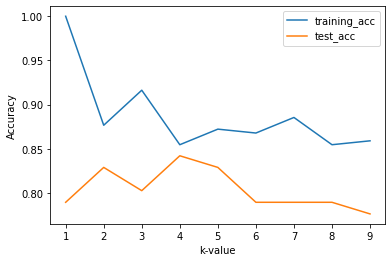

In [14]:
import matplotlib.pyplot as plt
acc_tr=[]
acc_ts=[]
for i in range(1,10):
    knc=KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train,y_train)
    acc_tr.append(knc.score(x_train,y_train))
    acc_ts.append(knc.score(x_test,y_test))

            
            
plt.plot(range(1,10),acc_tr)
plt.plot(range(1,10),acc_ts)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.legend(['training_acc','test_acc'])
plt.show()
    

Here we can see for k-value=4 train & test accuracy is quite comparable

We also can choose n_neighbors for minimum error rate as in where y_prediction!= y_test

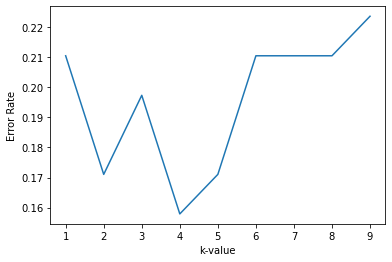

In [15]:
error_rate=[]
for i in range(1,10):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    pred=knn1.predict(x_test)
    error_rate.append(np.mean(y_test!=pred))

            
            
plt.plot(range(1,10),error_rate)
plt.xlabel('k-value')
plt.ylabel('Error Rate')
plt.show()

From both percpective we are getting K-value=4

In [16]:
# Null accuracy :

As far we have seen our model is doing good job but we can not be sure without checking it on null accuracy parameter

In [17]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [18]:
most_frequent_target=1 # i.e. patient has heart disease
frequency=165
null_accuracy=165/(165+138)
print(f"Null Accuracy: {null_accuracy}")

Null Accuracy: 0.5445544554455446


our model's accuracy i.e(0.8722) is significantly higher than null accuracy i.e(0.5445). so we can obtain that our model is doing good job in identifying different class labels. Now, based on the above analysis I can conclude that my classification model accuracy is very good. But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors classifer is making.

I will do more digging .I have another tool called Confusion matrix.

In [19]:
#### Confusion Matrix

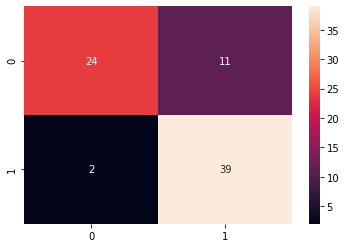

In [20]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
TN=cm[0,0]
TP=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

In [21]:
# Classification Accuracy:
ca=(TP+TN)/(TP+TN+FP+FN)
print(f"Classification Accuracy: {ca}")

# Classification Error:
ce=(FP+FN)/(TP+TN+FP+FN)
print(f"Classification Error: {ce}")


Classification Accuracy: 0.8289473684210527
Classification Error: 0.17105263157894737


In [22]:
#### Classification Report:

In [23]:
clfr=classification_report(y_test,y_predict)
print(f"Classification Report:\n {clfr}")

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79        35
           1       0.78      0.95      0.86        41

    accuracy                           0.83        76
   macro avg       0.85      0.82      0.82        76
weighted avg       0.85      0.83      0.82        76



In [24]:
#### precision,recall/sensitivity,specificity,F1_score

In [25]:
#Precision
pre=TP/float(TP+FP)
print(f"Precision: {pre}")

#Recall:
recall=TP/float(TP+FN)
print(f"Recall: {recall}")

#Specificity:
sp=TN/float(TN+FP)
print(f"Specificity: {sp}")

#F1_score
F1_score=2 *( (pre * recall) / (pre + recall))
print(f"F1_score: {F1_score}")

Precision: 0.9512195121951219
Recall: 0.78
Specificity: 0.9230769230769231
F1_score: 0.8571428571428571


In [26]:
#conclusion

##### Support: Count of test data point or rows
Support is the actual number of occurrences of the class in our dataset.(value counts of target in test data set),here in our dataset

support for 0 class-35

support for 1 class-41

In [27]:
#### Roc Curve

Thresholds : [2.  1.  0.8 0.6 0.4 0.2 0. ]


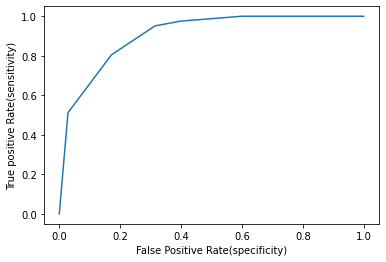

In [28]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold=roc_curve(y_test,knn.predict_proba(x_test)[:,1])
print(f"Thresholds : {threshold}")
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate(specificity)')
plt.ylabel('True positive Rate(sensitivity)')
plt.show()


In [29]:
# Roc_AUC Score

In [30]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])
print(f"ROC_AUC Score: {score}")

ROC_AUC Score: 0.9069686411149825


In [ ]:
#HyperParameter Tuning:

In [32]:
from sklearn.model_selection import StratifiedKFold
knn_h=KNeighborsClassifier()
param={ 'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
      }
cv= StratifiedKFold(n_splits=5)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
clf=RandomizedSearchCV(knn_h,param,cv=cv,verbose=3,n_jobs=-1,scoring="accuracy",n_iter=100)

In [34]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/home/vaishu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=3)

In [36]:
clf.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'algorithm': 'auto'}

In [37]:
pred_h=clf.predict(x_test)

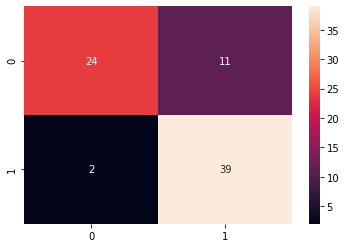

In [41]:
cm1=confusion_matrix(y_test,y_predict)
sns.heatmap(cm1,annot=True)
TN1=cm1[0,0]
TP1=cm1[1,1]
FP1=cm1[1,0]
FN1=cm1[0,1]

In [42]:
# Classification Accuracy:
ca1=(TP1+TN1)/(TP1+TN1+FP1+FN1)
print(f"Classification Accuracy: {ca1}")

# Classification Error:
ce1=(FP1+FN1)/(TP1+TN1+FP1+FN1)
print(f"Classification Error: {ce1}")


Classification Accuracy: 0.8289473684210527
Classification Error: 0.17105263157894737
